<a href="https://colab.research.google.com/github/rittmang/Data-Mining/blob/master/Titanic/titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
%tensorflow_version 1.x
import tensorflow as tf

from tensorflow.python.data import Dataset
import datetime
import random
import seaborn as sns
from functools import reduce

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.2f}'.format

TensorFlow 1.x selected.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Get data

In [2]:
train=pd.read_csv("https://raw.githubusercontent.com/rittmang/Data-Mining/master/Titanic/train.csv")
test=pd.read_csv("https://raw.githubusercontent.com/rittmang/Data-Mining/master/Titanic/test.csv")
full=train.append(test)
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


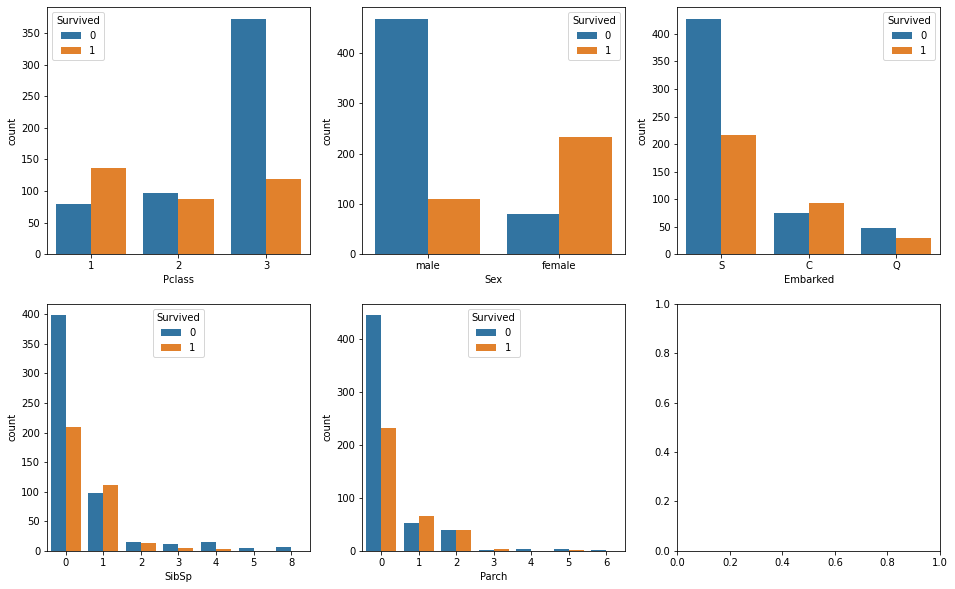

In [5]:
f,ax = plt.subplots(2,3,figsize=(16,10))
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[0,0])
sns.countplot('Sex',hue='Survived',data=train,ax=ax[0,1])
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[0,2])
sns.countplot('SibSp',hue='Survived',data=train,ax=ax[1,0])
sns.countplot('Parch',hue='Survived',data=train,ax=ax[1,1])

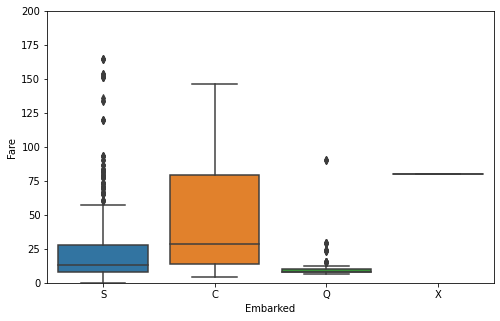

In [6]:
x = 'Embarked'
y = 'Fare'
hue = 'Pclass'
data = full.copy()
data['Embarked'].fillna('X', inplace=True)
f, ax = plt.subplots(figsize=(8, 5))
fig = sns.boxplot(x=x, y=y,  data=data)
fig.axis(ymin=0, ymax=200);



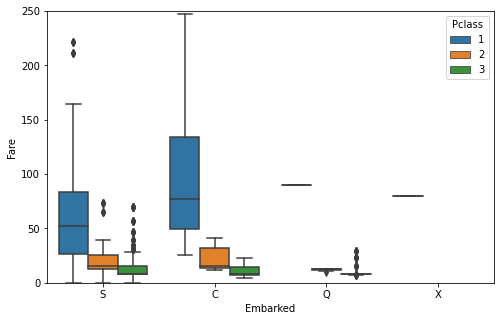

In [7]:
f, ax = plt.subplots(figsize=(8, 5))
fig = sns.boxplot(x=x, y=y, hue=hue, data=data)
fig.axis(ymin=0, ymax=250);

In [0]:
full['Embarked'].fillna('C', inplace=True)

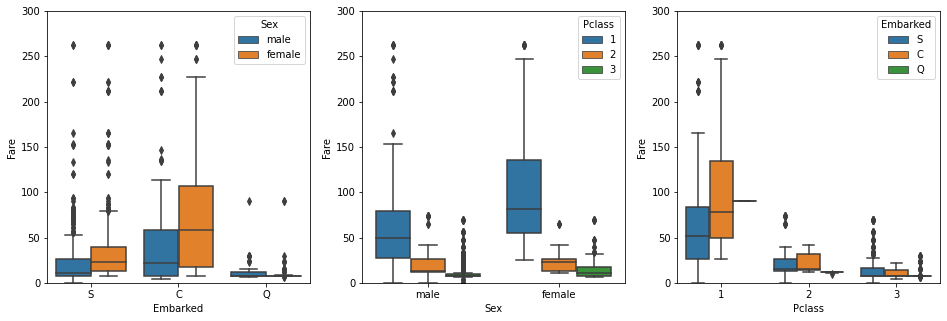

In [9]:
f,ax = plt.subplots(1,3,figsize=(16,5))

x = 'Embarked'
y = 'Fare'
hue = 'Sex'
data = full.copy()
fig = sns.boxplot(x=x, y=y, hue=hue, data=data,ax=ax[0])
fig.axis(ymin=0, ymax=300);

x = 'Sex'
y = 'Fare'
hue = 'Pclass'
data = full.copy()
fig = sns.boxplot(x=x, y=y, hue=hue, data=data,ax=ax[1])
fig.axis(ymin=0, ymax=300);

x = 'Pclass'
y = 'Fare'
hue = 'Embarked'
data = full.copy()
fig = sns.boxplot(x=x, y=y, hue=hue, data=data,ax=ax[2])
fig.axis(ymin=0, ymax=300);

In [0]:
for sex in full.Sex.unique():
    for pclass in full.Pclass.unique():
        for embarked in full.Embarked.unique():
            features = (full.Sex == sex) & (full.Pclass == pclass) & (full.Embarked == embarked)
            select_nan = np.isnan(full["Fare"]) & features
            full.loc[select_nan,'Fare'] = full[features].Fare.median()

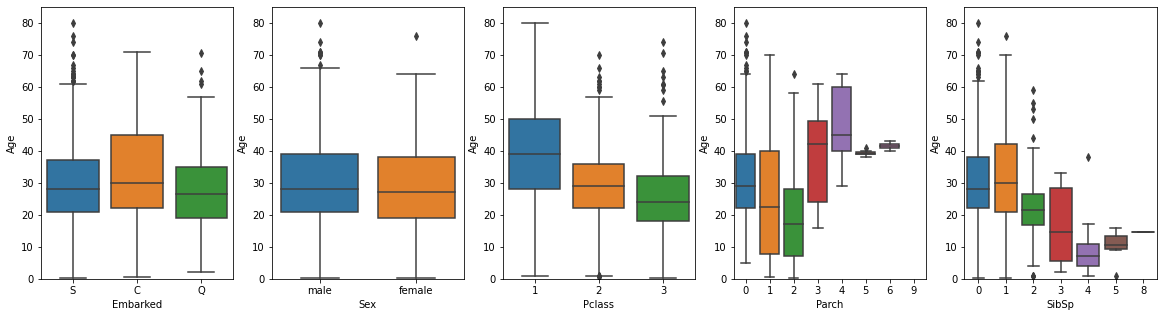

In [11]:
f,ax = plt.subplots(1,5,figsize=(20,5))

x = 'Embarked'
y = 'Age'
data = full.copy()
fig = sns.boxplot(x=x, y=y, data=data,ax=ax[0])
fig.axis(ymin=0, ymax=85);

x = 'Sex'
y = 'Age'
data = full.copy()
fig = sns.boxplot(x=x, y=y,  data=data,ax=ax[1])
fig.axis(ymin=0, ymax=85);

x = 'Pclass'
y = 'Age'
data = full.copy()
fig = sns.boxplot(x=x, y=y,  data=data,ax=ax[2])
fig.axis(ymin=0, ymax=85);

x = 'Parch'
y = 'Age'
data = full.copy()
fig = sns.boxplot(x=x, y=y,  data=data,ax=ax[3])
fig.axis(ymin=0, ymax=85);

x = 'SibSp'
y = 'Age'
data = full.copy()
fig = sns.boxplot(x=x, y=y,  data=data,ax=ax[4])
fig.axis(ymin=0, ymax=85);

In [0]:
for sibSp in full.SibSp.unique():
    for pclass in full.Pclass.unique():
        for embarked in full.Embarked.unique():
            features = (full.SibSp == sibSp) & (full.Pclass == pclass) & (full.Embarked == embarked)
            select_nan = np.isnan(full["Age"]) & features
            full.loc[select_nan,'Age'] = full[features].Age.mean()

In [13]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1306 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [14]:
full['Age'].fillna(full[(full.SibSp == 2) & (full.Pclass == 3)]['Age'].mean(), inplace=True)
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


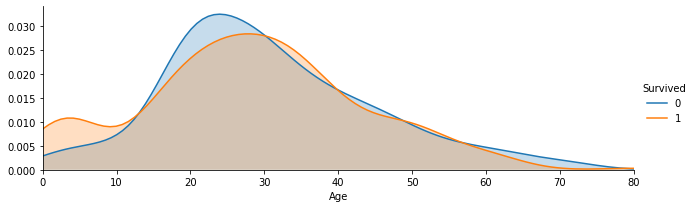

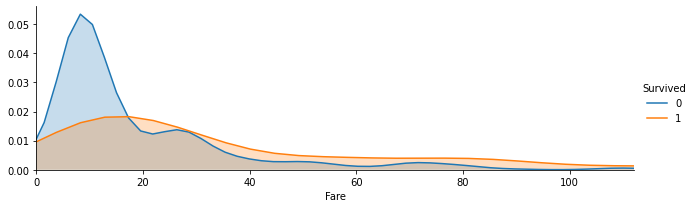

In [15]:
a = sns.FacetGrid( train, hue = 'Survived', aspect=3 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()

a = sns.FacetGrid( train, hue = 'Survived', aspect=3 )
a.map(sns.kdeplot, 'Fare', shade= True )
a.set(xlim=(0 , train['Fare'].quantile(0.95)))
a.add_legend()

In [16]:
age_boundaries = [14, 30, 40, 49, 57]
fare_boundaries = [18, 25]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


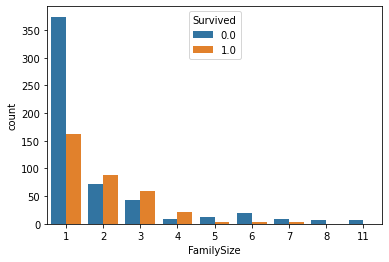

In [17]:
full['FamilySize'] = full.SibSp + full.Parch + 1
train = full.head(891)
test = full.tail(418)
sns.countplot('FamilySize',hue='Survived',data=train)

In [0]:
family_size_boundaries=[1, 4]
full['Single'] = full.FamilySize.apply(lambda fs: True if fs == 1 else False)

In [19]:
full.Name.sample(10)

18     Vander Planke, Mrs. Julius (Emelia Maria Vande...
242                         Spedden, Mr. Frederic Oakley
448                       Baclini, Miss. Marie Catherine
384                       Wheeler, Mr. Edwin Frederick""
829            Stone, Mrs. George Nelson (Martha Evelyn)
117                      Sandstrom, Miss. Beatrice Irene
293                                  Haas, Miss. Aloisia
356                          Bowerman, Miss. Elsie Edith
114               Straus, Mrs. Isidor (Rosalie Ida Blun)
607                          Daniel, Mr. Robert Williams
Name: Name, dtype: object

In [20]:
full['Title'] = full['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
full['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

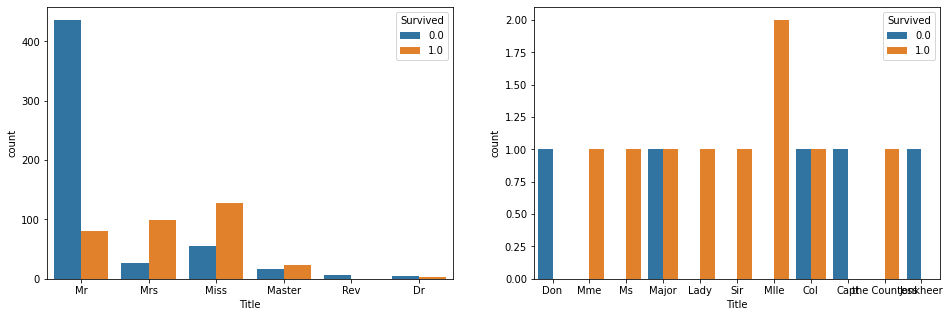

In [21]:
train = full.head(891)
test = full.tail(418)

title_names = (train['Title'].value_counts() > 2) 
train.insert(loc = len(train.columns),column='BigTitle', value=train['Title'].apply(lambda x: title_names.loc[x]))
train[train.BigTitle == True].Title.unique()
f,ax = plt.subplots(1,2,figsize=(16,5))
sns.countplot('Title',hue='Survived',data=train[train.BigTitle == True], ax=ax[0])
sns.countplot('Title',hue='Survived',data=train[train.BigTitle == False], ax=ax[1])

In [22]:
full['Title'] = full['Title'].apply(lambda title: 'Don' if not title_names.index.str.contains(title).any() else title)
full['Title'] = full['Title'].apply(lambda title: title if title_names.loc[title] == True else 'X')
full.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'X', 'Rev', 'Dr'], dtype=object)

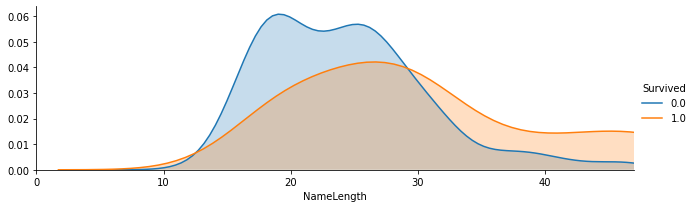

In [23]:
full['NameLength'] = full['Name'].apply(lambda name: len(name))
train = full.head(891)
test = full.tail(418)
a = sns.FacetGrid( train, hue = 'Survived', aspect=3 )
a.map(sns.kdeplot, 'NameLength', shade= True )
a.set(xlim=(0 , train['NameLength'].quantile(0.95)))
a.add_legend()

In [24]:
name_length_boundaries = [12, 28]
full.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Single',
       'Title', 'NameLength'],
      dtype='object')

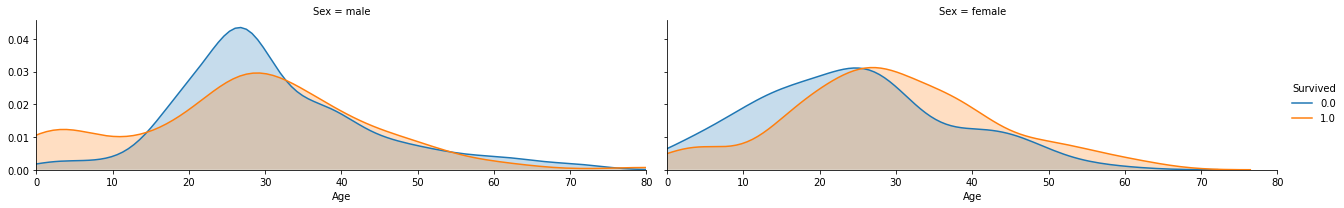

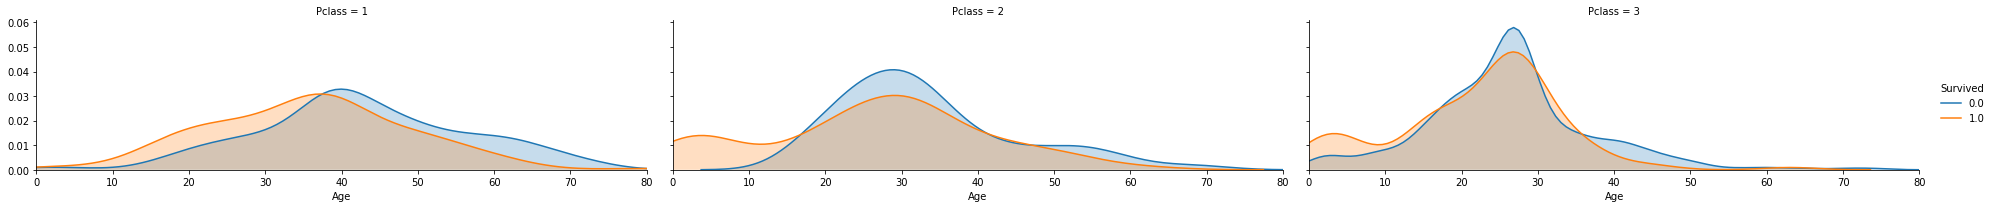

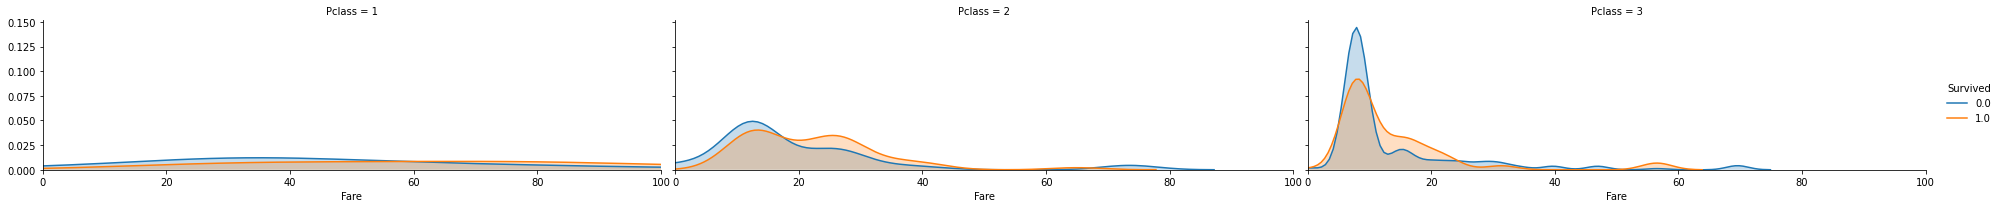

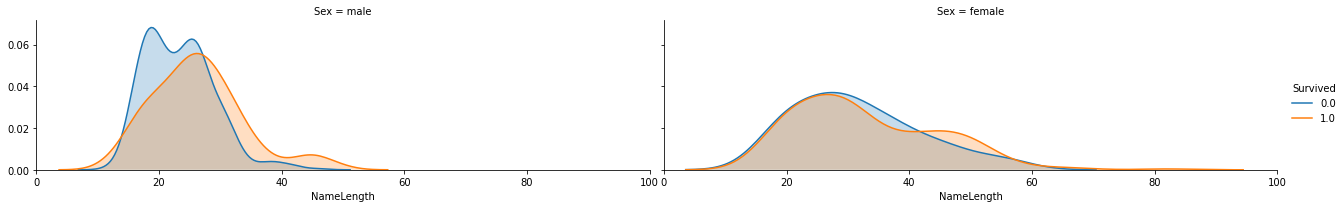

In [25]:
a = sns.FacetGrid( train,col='Sex', hue = 'Survived', aspect=3 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()

a = sns.FacetGrid( train,col='Pclass', hue = 'Survived', aspect=3 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()

a = sns.FacetGrid( train,col='Pclass', hue = 'Survived', aspect=3 )
a.map(sns.kdeplot, 'Fare', shade= True )
a.set(xlim=(0 , 100))
a.add_legend()

a = sns.FacetGrid( train,col='Sex', hue = 'Survived', aspect=3 )
a.map(sns.kdeplot, 'NameLength', shade= True )
a.set(xlim=(0 , 100))
a.add_legend()

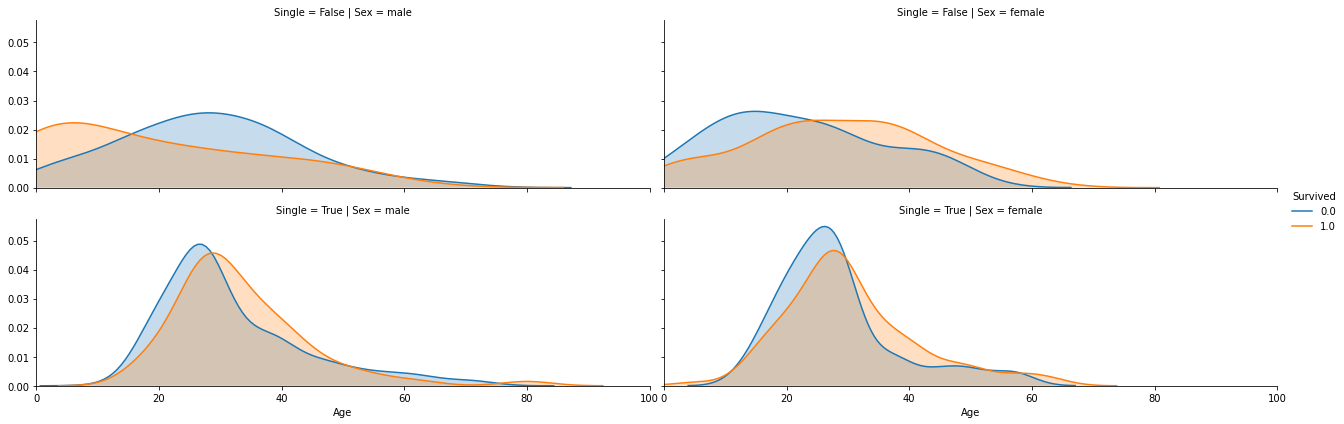

In [26]:
a = sns.FacetGrid( train,col='Sex', row='Single', hue = 'Survived', aspect=3 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , 100))
a.add_legend()

In [0]:
sex_cross_age_boundaries = [15, 26, 32,46, 54]
parch_cross_age_boundaries = [5, 10, 18, 30, 35]
pclass_cross_age_boundaries = [18, 30, 36, 40, 47]
pclass_cross_fare_boundaries = [8,18,25, 55]
sex_cross_name_length_boundaries = [12, 26, 42]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


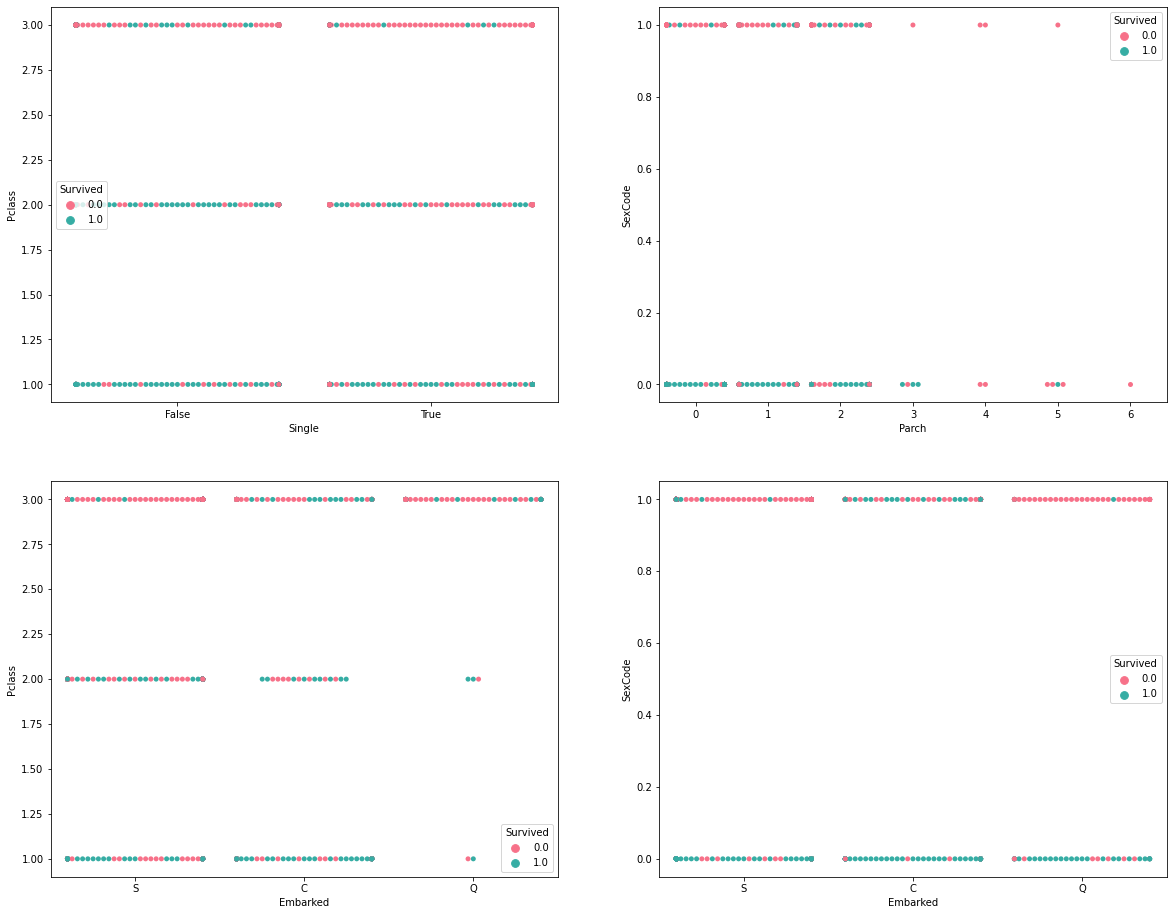

In [28]:
train = full.head(891)
test = full.tail(418)

train['SexCode'] = train.Sex.apply(lambda sex: 1 if sex == 'male' else 0)

f,ax = plt.subplots(2,2,figsize=(20,16))

sns.swarmplot(x='Single',y='Pclass',hue='Survived',data=train,palette='husl',ax=ax[0,0])
sns.swarmplot(x='Parch',y='SexCode',hue='Survived',data=train,palette='husl',ax=ax[0,1])
sns.swarmplot(x='Embarked',y='Pclass',hue='Survived',data=train,palette='husl',ax=ax[1,0])
sns.swarmplot(x='Embarked',y='SexCode',hue='Survived',data=train,palette='husl',ax=ax[1,1])

In [0]:
full['Parch'] = full['Parch'].apply(lambda parch: parch if parch <= 2 else 2)
full['SibSp'] = full['SibSp'].apply(lambda parch: parch if parch <= 5 else 5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


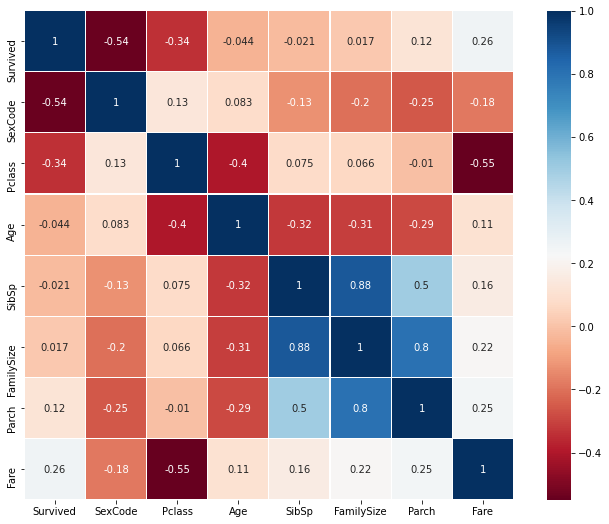

In [30]:
train = full.head(891)
test = full.tail(418)
train['SexCode'] = train.Sex.apply(lambda sex: 1 if sex == 'male' else 0)
#train = pd.get_dummies(data=train, columns = ['Sex'])
corrmat = train[['Survived', 'SexCode', 'Pclass', 'Age', 'SibSp', 'FamilySize', 'Parch', 'Fare']].corr()
f, ax = plt.subplots(figsize=(12, 9))
colormap = plt.cm.RdBu
sns.heatmap(corrmat,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [0]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.

    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
    
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                             

    # Construct a dataset, and configure batching/repeating
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit      
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified
    if shuffle:
        ds = ds.shuffle(10000)

    # Return the next batch of data
    features, labels = ds.make_one_shot_iterator().get_next()

    return features, labels

In [0]:
def train_linear_classifier_model(
    learning_rate,
    steps,
    batch_size,
    periods,
    regularization_strength,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    """Trains a linear regression model of one feature.
  
  In addition to training, this function also prints training progress information,
  as well as a plot of the training and validation loss over time.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.
      
  Returns:
    A `LinearClassifier` object trained on the training data.
  """

    steps_per_period = steps / periods
    
    # Create a linear classifier object.
    my_optimizer = tf.train.FtrlOptimizer(learning_rate=learning_rate, l1_regularization_strength=regularization_strength)
    #my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)    
    linear_classifier = tf.estimator.DNNClassifier(
    #linear_classifier = tf.estimator.LinearClassifier(
      feature_columns=construct_feature_columns(training_examples),
      hidden_units=[10, 10],
      optimizer=my_optimizer
    )
    
    # Create input functions
    training_input_fn = lambda: my_input_fn(training_examples, 
                                          training_targets["target"], 
                                          batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                  training_targets["target"], 
                                                  num_epochs=1, 
                                                  shuffle=False)
    predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["target"], 
                                                    num_epochs=1, 
                                                    shuffle=False)
    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("LogLoss (on training data):")
    training_log_losses = []
    validation_log_losses = []
    for period in range (0, periods):
        # Train the model, starting from the prior state.
        linear_classifier.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )
        # Take a break and compute predictions.    
        training_probabilities = linear_classifier.predict(input_fn=predict_training_input_fn)
        training_probabilities = np.array([item['probabilities'] for item in training_probabilities])

        validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
        validation_probabilities = np.array([item['probabilities'] for item in validation_probabilities])

        training_log_loss = metrics.log_loss(training_targets, training_probabilities)
        validation_log_loss = metrics.log_loss(validation_targets, validation_probabilities)
        # Occasionally print the current loss.
        print( "  period %02d : %0.2f" % (period, training_log_loss))
        # Add the loss metrics from this period to our list.
        training_log_losses.append(training_log_loss)
        validation_log_losses.append(validation_log_loss)
    print("Model training finished.")
    
    # Output a graph of loss metrics over periods.
    plt.ylabel("LogLoss")
    plt.xlabel("Periods")
    plt.title("LogLoss vs. Periods")
    plt.tight_layout()
    plt.plot(training_log_losses, label="training")
    plt.plot(validation_log_losses, label="validation")
    plt.legend()

    return linear_classifier

In [0]:
def preprocess_features(df):
    """Prepares input features from tantic data set.

    Args:
    df: A Pandas DataFrame expected to contain data
      from the train data set.
    Returns:
    A DataFrame that contains the features to be used for the model, including
    synthetic features.
    """
    selected_features = df[
        ['Sex', 'Pclass', 'Age', 'Parch', 'SibSp', 'FamilySize', 'Single', 'Fare', 'Title', 'Embarked', 'NameLength']]
    processed_features = selected_features.copy()
    
    return processed_features

def preprocess_targets(df):
    """Prepares target features (i.e., labels) from tantic data set.

    Args:
    df: A Pandas DataFrame expected to contain data
      from the train data set.
    Returns:
    A DataFrame that contains the target feature.
    """
    output_targets = pd.DataFrame()
    output_targets["target"] =  df['Survived'] 
    return output_targets

In [34]:
train = full.head(891)
test = full.tail(418)

training_examples = preprocess_features(train.head(700))
training_targets = preprocess_targets(train.head(700))

validation_examples = preprocess_features(train.tail(291))
validation_targets = preprocess_targets(train.tail(291))

# Double-check that we've done the right thing.
print ("Training examples summary:")
display.display(training_examples.describe())
print( "Validation examples summary:")
display.display(validation_examples.describe())

#print( "Training targets summary:")
#display.display(training_targets.describe())
#print( "Validation targets summary:")
#display.display(validation_targets.describe())

Training examples summary:


,Pclass,Age,Parch,SibSp,FamilySize,Fare,NameLength
count,700.00,700.00,700.00,700.00,700.00,700.00,700.00
mean,2.31,29.67,0.35,0.52,1.92,32.22,26.92
std,0.84,13.48,0.67,0.97,1.59,48.28,9.32
min,1.00,0.75,0.00,0.00,1.00,0.00,12.00
25%,2.00,22.00,0.00,0.00,1.00,7.92,20.00
50%,3.00,27.70,0.00,0.00,1.00,14.50,25.00
75%,3.00,37.00,0.00,1.00,2.00,31.27,30.00
max,3.00,80.00,2.00,5.00,11.00,512.33,82.00


Validation examples summary:


,Pclass,Age,Parch,SibSp,FamilySize,Fare,NameLength
count,291.00,291.00,291.00,291.00,291.00,291.00,291.00
mean,2.31,29.44,0.34,0.46,1.89,32.94,26.86
std,0.84,13.48,0.65,0.93,1.67,56.15,9.13
min,1.00,0.42,0.00,0.00,1.00,0.00,12.00
25%,2.00,21.00,0.00,0.00,1.00,7.90,20.00
50%,3.00,27.70,0.00,0.00,1.00,13.50,25.00
75%,3.00,38.00,0.00,1.00,2.00,31.80,30.50
max,3.00,80.00,2.00,5.00,11.00,512.33,61.00


In [0]:
def cross_columns(crolss_array, hash_bucket_size=1000):
    cross_column = tf.feature_column.indicator_column(tf.feature_column.crossed_column(crolss_array , hash_bucket_size=hash_bucket_size))
    return cross_column
    
def construct_feature_columns(input_features):
    """Construct the TensorFlow Feature Columns.

    Args:
    input_features: The names of the numerical input features to use.
    Returns:
    A set of feature columns
    """
    features = []

    sex_categorical_column = tf.feature_column.categorical_column_with_vocabulary_list(key='Sex',vocabulary_list=["M", "F"])
    sex_indicator_column = tf.feature_column.indicator_column(sex_categorical_column)
    features.append(sex_indicator_column)

    pclass_categorical_column = tf.feature_column.categorical_column_with_identity(key='Pclass',num_buckets=4)
    pclass_indicator_column = tf.feature_column.indicator_column(pclass_categorical_column)
    features.append(pclass_indicator_column)
    
    embarked_categorical_column = tf.feature_column.categorical_column_with_vocabulary_list(key='Embarked',vocabulary_list=["S", "C", "Q"])
    embarked_indicator_column = tf.feature_column.indicator_column(embarked_categorical_column)
    features.append(embarked_indicator_column)
        
    title_categorical_column = tf.feature_column.categorical_column_with_vocabulary_list(key='Title',vocabulary_list=full.Title.unique())
    title_indicator_column = tf.feature_column.indicator_column(title_categorical_column)
    features.append(title_indicator_column)
    
    name_length_categorical_column = tf.feature_column.numeric_column("NameLength")
    name_length_bucket_column = tf.feature_column.bucketized_column(name_length_categorical_column, boundaries=name_length_boundaries)
    features.append(name_length_bucket_column)

    parch_categorical_column = tf.feature_column.categorical_column_with_identity(key='Parch',num_buckets=4)
    parch_indicator_column = tf.feature_column.indicator_column(parch_categorical_column)
    #features.append(parch_indicator_column)
    
    sibsp_categorical_column = tf.feature_column.categorical_column_with_identity(key='SibSp',num_buckets=4)
    sibsp_indicator_column = tf.feature_column.indicator_column(sibsp_categorical_column)
    #features.append(sibsp_indicator_column)
    
    family_size_categorical_column = tf.feature_column.numeric_column("FamilySize")
    family_size_bucket_column = tf.feature_column.bucketized_column(family_size_categorical_column, boundaries=family_size_boundaries)
    features.append(family_size_bucket_column)
    
    single_numric_column = tf.feature_column.numeric_column('Single')
    features.append(single_numric_column)
    
    age_categorical_column = tf.feature_column.numeric_column("Age")
    age_bucket_column = tf.feature_column.bucketized_column(age_categorical_column, boundaries=age_boundaries)
    #features.append(age_bucket_column)
    
    fare_categorical_column = tf.feature_column.numeric_column("Fare")
    fare_bucket_column = tf.feature_column.bucketized_column(fare_categorical_column, boundaries=fare_boundaries)
    features.append(fare_bucket_column)    
    
    
    sex_cross_age_bucket_column = tf.feature_column.bucketized_column(age_categorical_column, boundaries=age_boundaries)
    features.append(cross_columns(['Sex', 'Single', sex_cross_age_bucket_column]))        
            
    parch_cross_age_bucket_column = tf.feature_column.bucketized_column(age_categorical_column, boundaries=parch_cross_age_boundaries)
    #features.append(cross_columns(['Parch', parch_cross_age_bucket_column]))
    
    pclass_cross_fare_bucket_column = tf.feature_column.bucketized_column(fare_categorical_column, boundaries=pclass_cross_fare_boundaries)
    #features.append(cross_columns(['Pclass', pclass_cross_fare_bucket_column]))
    
    pclass_cross_age_bucket_column = tf.feature_column.bucketized_column(age_categorical_column, boundaries=pclass_cross_age_boundaries)
    #features.append(cross_columns(['Pclass', pclass_cross_age_bucket_column]))
    
    sex_cross_name_length_bucket_column = tf.feature_column.bucketized_column(name_length_categorical_column, boundaries=sex_cross_name_length_boundaries)
    #features.append(cross_columns(['Sex', sex_cross_name_length_bucket_column]))
        
    #features.append(cross_columns(['Sex', 'Pclass']))
    features.append(cross_columns(['SibSp', 'Parch'], 18))
    features.append(cross_columns(['SibSp', 'Sex'], 12))
    features.append(cross_columns(['Single', 'Pclass'], 6))
    
    #features.append(cross_columns([age_bucket_column, 'Pclass']))
    
    #features.append(cross_columns([age_bucket_column, 'Sex']))
    
    #features.append(cross_columns(['Embarked', 'Sex']))
    
    #features.append(cross_columns(['Embarked', age_bucket_column]))
    
    features.append(cross_columns(['Embarked', 'Pclass']))

    feature_columns = set(features)
    return feature_columns

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp7gwcevhu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_tim

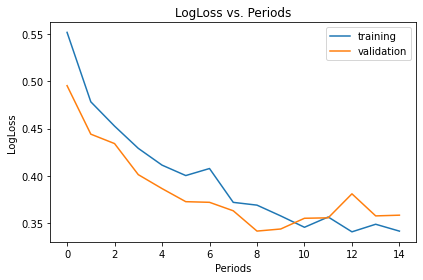

In [36]:
linear_classifier = train_linear_classifier_model(
    learning_rate=0.16,
    steps=200,
    batch_size=500,
    periods=15,
    regularization_strength=0.015,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets)

In [37]:
predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                    validation_targets["target"], 
                                                    num_epochs=1, 
                                                    shuffle=False)

evaluation_metrics = linear_classifier.evaluate(input_fn=predict_validation_input_fn)
print(evaluation_metrics.keys())
print("AUC on the validation set: %0.2f" % evaluation_metrics['auc'])
print("Accuracy on the validation set: %0.2f" % evaluation_metrics['accuracy'])
print(evaluation_metrics)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-11T13:07:59Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7gwcevhu/model.ckpt-210
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-05-11-13:08:00
INFO:tensorflow:Saving dict for global step 210: accuracy = 0.85223365, accuracy_baseline = 0.63573885, auc = 0.9151708, auc_precision_recall = 0.85801136, average_loss = 0.35829708, global_step = 210, label/mean = 0.36426118, loss = 0.35829708, precision = 0.83157897, prediction/mean = 0.32905138, recall = 0.745283
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 210: /tmp/tmp7gwcevhu/model.ckpt-210
dict_keys(['accuracy', 'accuracy_baseline', 'auc', 'auc_precision_recall', 'average_loss', 'label/mean', 'loss', 'pr

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7gwcevhu/model.ckpt-210
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


array([0.        , 0.3490566 , 0.3490566 , 0.38679245, 0.38679245,
       0.39622642, 0.40566038, 0.53773585, 0.53773585, 0.5754717 ,
       0.5754717 , 0.58490566, 0.60377358, 0.62264151, 0.62264151,
       0.64150943, 0.66037736, 0.67924528, 0.68867925, 0.70754717,
       0.71698113, 0.72641509, 0.73584906, 0.74528302, 0.74528302,
       0.75471698, 0.76415094, 0.78301887, 0.78301887, 0.80188679,
       0.80188679, 0.81132075, 0.82075472, 0.82075472, 0.83018868,
       0.83018868, 0.8490566 , 0.8490566 , 0.86792453, 0.87735849,
       0.88679245, 0.89622642, 0.89622642, 0.90566038, 0.90566038,
       0.91509434, 0.91509434, 0.91509434, 0.91509434, 0.9245283 ,
       0.9245283 , 0.94339623, 0.94339623, 0.95283019, 0.96226415,
       0.96226415, 0.97169811, 0.97169811, 0.98113208, 0.98113208,
       0.98113208, 0.98113208, 0.98113208, 0.98113208, 0.98113208,
       0.98113208, 0.98113208, 0.98113208, 0.98113208, 0.98113208,
       1.        , 1.        , 1.        , 1.        , 1.     

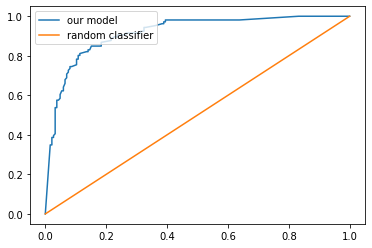

In [38]:
validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
# Get just the probabilities for the positive class
validation_probabilities = np.array([item['probabilities'][1] for item in validation_probabilities])

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    validation_targets, validation_probabilities)
plt.plot(false_positive_rate, true_positive_rate, label="our model")
plt.plot([0, 1], [0, 1], label="random classifier")
_ = plt.legend(loc=2)

true_positive_rate

In [0]:
def assign_probability(df, linear_classifier, validation=False,field='probability'):
    result = df.copy()
    fake = df.copy()
    fake['Survived'] = 0
    v_examples = preprocess_features(result)
    if validation:
        v_targets = preprocess_targets(result)
    else:
        v_targets = preprocess_targets(fake)
    predict_validation_input_fn = lambda: my_input_fn(v_examples, 
                                                        v_targets['target'], 
                                                        num_epochs=1, 
                                                        shuffle=False)
    validation_probabilities = linear_classifier.predict(input_fn=predict_validation_input_fn)
    result[field] = np.array([item['probabilities'][1] for item in validation_probabilities])
    return result

In [40]:
result = assign_probability(test, linear_classifier,False)
validation = assign_probability(train, linear_classifier,True)
validation

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7gwcevhu/model.ckpt-210
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp7gwcevhu/model.ckpt-210
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Single,Title,NameLength,probability
0,1,0.00,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,2,False,Mr,23,0.36
1,2,1.00,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,2,False,Mrs,51,0.89
2,3,1.00,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1,True,Miss,22,0.43
3,4,1.00,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,2,False,Mrs,44,0.89
4,5,0.00,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,1,True,Mr,24,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.00,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S,1,True,Rev,21,0.01
887,888,1.00,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S,1,True,Miss,28,0.89
888,889,0.00,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.05,1,2,W./C. 6607,23.45,NaN,S,4,False,Miss,40,0.04
889,890,1.00,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.00,C148,C,1,True,Mr,21,0.62


In [0]:
def find_treshold(validation):
    best_accuracy = 0
    best_threshold = 0
    target = 'Survived'
    for i in range(0, 101):
        threshold = i/100.0
        validation['new_survived'] = validation['probability'].apply(lambda p: 1 if p >= threshold else 0)
        accuracy = validation[validation['new_survived'] == validation['Survived']]['Survived'].count()/validation['Survived'].count().astype(float)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold
    threshold = best_threshold
    validation['new_survived'] = validation['probability'].apply(lambda p: 1 if p >= best_threshold else 0)

    p = validation[validation['probability'] >= threshold]
    n = validation[validation['probability'] < threshold]
    tp = p[p[target] == 1]
    fp = p[p[target] == 0]
    tn = n[n[target] == 0]
    fn = n[n[target] == 1]

    pn = p['Survived'].count().astype(float)
    nn = n['Survived'].count().astype(float)
    tpn = tp['Survived'].count().astype(float)
    fpn = fp['Survived'].count().astype(float)
    tnn = tn['Survived'].count().astype(float)
    fnn = fn['Survived'].count().astype(float)

    print ('best_threshold: %s' % threshold)
    print ('best_accuracy: %s' % best_accuracy)
    print ('result number: %s' % pn)
    print ('tpn: %s' % tpn)
    print ('fpn: %s' % fpn)
    print ('tnn: %s' % tnn)
    print ('fnn: %s' % fnn)

    precision = tpn / pn
    tp_rate = tpn / (tpn + fnn)
    fp_rate = fpn / (fpn + tnn)
    precision_n = tnn / (tnn + fnn)

    print ('precision: %s' % precision)
    print ('tp_rate: %s' % tp_rate)
    print ('fp_rate: %s' % fp_rate)
    print ('precision_n: %s' % precision_n)
    return best_threshold

In [42]:
threshold = find_treshold(validation)
threshold

best_threshold: 0.45
best_accuracy: 0.8641975308641975
result number: 313.0
tpn: 267.0
fpn: 46.0
tnn: 503.0
fnn: 75.0
precision: 0.853035143769968
tp_rate: 0.7807017543859649
fp_rate: 0.08378870673952642
precision_n: 0.870242214532872


0.45

In [43]:
result["Survived"] = result["probability"].apply(lambda a: 1 if a > threshold else 0)
evaluation = result[["PassengerId", "Survived"]]
evaluation

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:
from google.colab import files
evaluation.to_csv('evaluation_submission.csv',index=False)
files.download('evaluation_submission.csv')

In [0]:
evaluation.to_csv("evaluation_submission.csv",index=False)